In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

Análise Exploratória dos Dados

In [2]:
data_location = "../Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Verificando se há dados nulos

In [4]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
data.fraud.unique()

array([0., 1.])

In [6]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [7]:
#sns.pairplot(data, 
#            hue = 'fraud'
#             );

# Balanceamento da variável target

In [8]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

In [9]:
data.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Verificamos que nesse conjunto apenas 8% dos dados são de cartões fraudados

Para resolver o problema do balanceamento vamos primeiramente criar dois datasets, um para os dados com frades e outro com dados sem fraude

In [10]:
no_fraud=data[data.fraud == 0]
fraud=data[data.fraud == 1]

Pegando uma amostra de 5000 para cada cada dataset, com fraude e sem fraude

In [11]:
dt_no_fraude_sample=no_fraud.sample(n=5000)
dt_fraude_sample=fraud.sample(n=5000)

Criação de um novo dataset com as amostras criadas anteriormente

In [12]:
data_fraud=pd.concat([dt_no_fraude_sample,dt_fraude_sample],axis=0)

In [13]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: fraud, dtype: float64

In [14]:
data_fraud.shape

(10000, 8)

In [15]:
data_fraud.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.009039,-0.065021,0.159878,-0.110171,-0.033592,0.068688,0.211334
distance_from_last_transaction,-0.009039,1.000000,-0.032915,-0.022041,-0.035551,-0.022199,0.022661,0.112397
ratio_to_median_purchase_price,-0.065021,-0.032915,1.000000,-0.018705,0.025062,-0.099903,0.156611,0.495000
repeat_retailer,0.159878,-0.022041,-0.018705,1.000000,-0.007950,-0.003565,0.077669,0.009319
used_chip,-0.110171,-0.035551,0.025062,-0.007950,1.000000,-0.000167,-0.017439,-0.105515
used_pin_number,-0.033592,-0.022199,-0.099903,-0.003565,-0.000167,1.000000,-0.095426,-0.230540
online_order,0.068688,0.022661,0.156611,0.077669,-0.017439,-0.095426,1.000000,0.410926
fraud,0.211334,0.112397,0.495000,0.009319,-0.105515,-0.230540,0.410926,1.000000


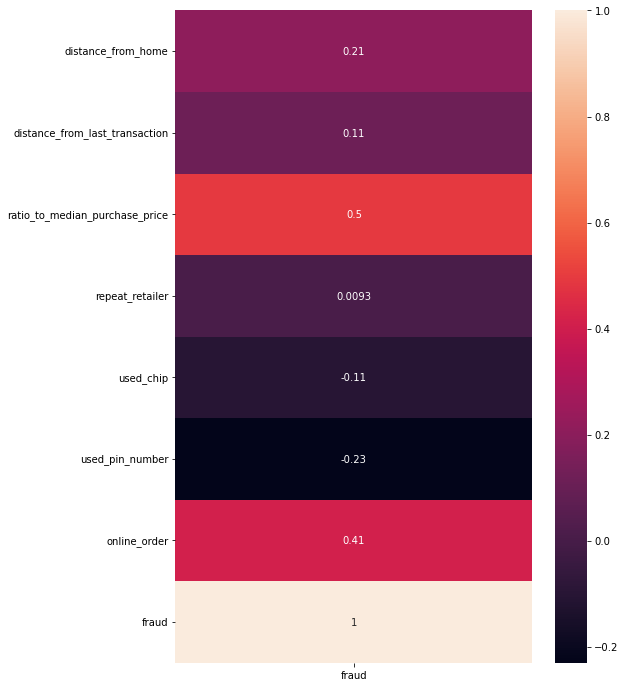

In [16]:
plt.figure(figsize = (8,12))
sns.heatmap(data_fraud.corr()[['fraud']], 
            annot = True
           );

Observando a distribuição dos dados

In [17]:
#sns.pairplot(data_fraud, 
#            hue = 'fraud'
#             );

# Criação de uma lista vazia para armazenar as métricas dos modelos

In [18]:
data_all=[]

# Definição das matriz features, variável varget

Definindo a matriz de features e a variável target

In [19]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

# Split do dataset de treino e de teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Padronização das features do modelos de treino e de teste

In [21]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo 1: Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [22]:
lr = LogisticRegression()

Ajuste do modelo

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression()

Visualização dos coeficientes

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[ 2.94847812  1.91751525  5.3538058  -0.47684841 -0.46799936 -1.8582094
   2.03560375]]
[0.35917874]


Previsão da acurácia com o modelo treinado

In [25]:
score_train_lr = accuracy_score(y_train, lr.predict(X_train_std))
print('Score train: ', score_train_lr)

Score train:  0.9442666666666667


Matriz de confusão do modelo de treino

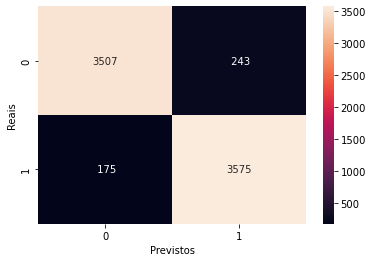

In [26]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 3750 casos positivos de fraud 3588 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [27]:
y_test_pred_lr = lr.predict(X_test_std)

Acurácia do modelo de teste

In [28]:
score_test_lr = accuracy_score(y_test, y_test_pred_lr)
print('Score test: ', score_test_lr)

Score test:  0.9388


Matriz de confusão do modelo de teste

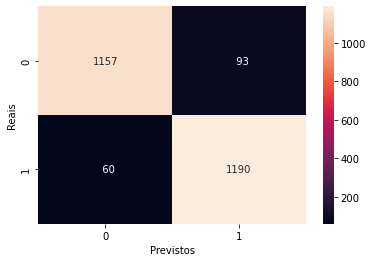

In [29]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 1250 casos positivos de fraud 1188 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Métricas do modelo de teste

In [30]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_lr, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.95      0.93      0.94      1250
     Fraud 1       0.93      0.95      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



Inserindo as métricas na lista para armazenamento

In [31]:
m='Logistic Regression'
test_recall_lr = recall_score(y_test, y_test_pred_lr, pos_label=1)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_test_pred_lr, pos_label=1)
test_auc_lr = auc(fpr_lr,tpr_lr)
f1_score_lr = f1_score(y_test, y_test_pred_lr)
data_all.append([m,score_train_lr,score_test_lr,test_recall_lr,test_auc_lr,f1_score_lr])

# Modelo 2: Randon Forest

In [32]:
rf=RandomForestClassifier()

Treino do modelo usando os conjuntos de treinamento y_pred=clf.predict(X_test)

In [33]:
rf.fit(X_train_std, y_train)

RandomForestClassifier()

Previsão da acurácia com o modelo de teste

In [34]:
score_train_rf = accuracy_score(y_train, rf.predict(X_train_std))
print('Score train: ', score_train_rf)

Score train:  1.0


Atribuindo A variável y_test_pred a previsão

In [35]:
y_test_pred_rf = rf.predict(X_test_std)

Atribuindo a variável score_test a acurácia

In [36]:
score_test_rf = accuracy_score(y_test, y_test_pred_rf)
print('Score test: ', score_test_rf)

Score test:  0.9984


Matriz de confusão do modelo de teste

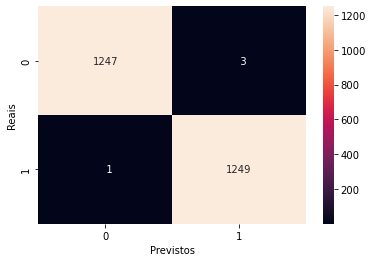

In [37]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observando as métricas

In [38]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_rf, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00      1250
     Fraud 1       1.00      1.00      1.00      1250

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



Inserindo as métricas na lista para armazenamento

In [39]:
m='Randon Forest'
test_recall_rf = recall_score(y_test, y_test_pred_rf, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_test_pred_rf, pos_label=1)
test_auc_rf = auc(fpr_rf,tpr_rf)
f1_score_rf = f1_score(y_test, y_test_pred_rf)
data_all.append([m,score_train_rf,score_test_rf,test_recall_rf,test_auc_rf,f1_score_rf])

# Modelo 3: KNeighborsRegressor

Escolha da escolher metrica (Euclidean,  Manhattan ou Chebyshev)
Escolher com quantos vizinhos a quantidade de vizinhos próximos pelo modelo de validação cruzada.

In [40]:
# Usamos cross validation co, 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)
scores_para_df = []
for i in range(1, 26):
# Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
    model_euclidean = KNeighborsClassifier(metric = 'euclidean', n_neighbors = i)
    model_manhattan = KNeighborsClassifier(metric = 'manhattan', n_neighbors = i)
    model_chebyshev = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = i)
# cross_val_scores retorna uma matriz de 5 resultados,
# um para cada partição que automaticamente criou CV
    cv_scores = cross_val_score(model_euclidean, X_train_std, y_train, cv = kf)
    cv_scores2 = cross_val_score(model_manhattan, X_train_std, y_train, cv = kf)
    cv_scores3 = cross_val_score(model_chebyshev, X_train_std, y_train, cv = kf)
# Para cada valor de n_neighbours, criamos um dicionário com o valor
# de n_neighbours e a média das pontuações
    dict_row_score = { 'n_neighbors': i, 'euclidean': np.mean(cv_scores),'manhattan': np.mean(cv_scores2),'chebyshev': np.mean(cv_scores3)}
# Salvamos cada um na lista definida fora do loop
    scores_para_df.append(dict_row_score)

De acordo com os vizinhos próximos as 3 melhores accuracy das metricas estão grifadas em amarelo, a melhor metrica foi a manhattan

In [41]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.style.highlight_max(subset=['euclidean','manhattan','chebyshev'])

,n_neighbors,euclidean,manhattan,chebyshev
0,1,0.992667,0.993200,0.992133
1,2,0.990800,0.992533,0.988533
2,3,0.992000,0.991867,0.990533
3,4,0.990400,0.990800,0.988800
4,5,0.988533,0.990267,0.987733
5,6,0.988800,0.990000,0.987067
6,7,0.987600,0.989733,0.986933
7,8,0.986400,0.989067,0.985200
8,9,0.986800,0.987600,0.984800
9,10,0.985733,0.987200,0.984533


Conforme identificado acima a metrica distância de Manhattan com 3 vizinhos é a melhor opção.

In [42]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3)

Treino do modelo usando a distancia e métrica identificada

In [43]:
knn.fit(X_train_std, y_train);

Previsão com o modelo de teste

In [44]:
y_test_pred_knn = knn.predict(X_test_std)

Previsão da acurácia

accuracy_score(y_test, y_pred_knn).round(4)

In [45]:
score_train_knn = accuracy_score(y_train, knn.predict(X_train_std))
print('Score train: ', score_train_knn)

Score train:  0.9965333333333334


In [46]:
score_test_knn = accuracy_score(y_test, y_test_pred_knn)
print('Score test: ', score_test_knn)

Score test:  0.9912


Matriz de confusão

In [47]:
confusion_matrix(y_test,y_test_pred_knn)

array([[1232,   18],
       [   4, 1246]], dtype=int64)

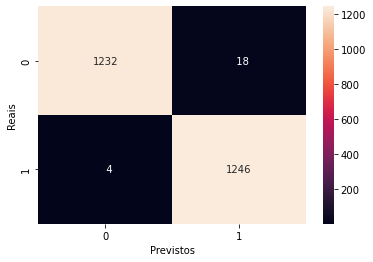

In [48]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observando as métricas

In [49]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_knn, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      0.99      0.99      1250
     Fraud 1       0.99      1.00      0.99      1250

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



Inserindo as métricas na lista para armazenamento

In [50]:
m='KNN'
test_recall_knn = recall_score(y_test, y_test_pred_knn, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_test_pred_knn, pos_label=1)
test_auc_knn = auc(fpr_knn,tpr_knn)
f1_score_knn = f1_score(y_test, y_test_pred_knn)
data_all.append([m,score_train_knn,score_test_knn,test_recall_knn,test_auc_knn,f1_score_knn])

# Resumo das métricas dos modelos

Atribuindo nome das colunas no dataframe de metricas e imprimindo as informações de todos modelos.

In [51]:
models=['LogReg','RanFor', 'KNN']
pd_scores=pd.DataFrame(data_all,columns=['model','train score','test score','test recall','test_auc','F1 Score'])
print(pd_scores)

                 model  train score  test score  test recall  test_auc  \
0  Logistic Regression     0.944267      0.9388       0.9520    0.9388   
1        Randon Forest     1.000000      0.9984       0.9992    0.9984   
2                  KNN     0.996533      0.9912       0.9968    0.9912   

   F1 Score  
0  0.939597  
1  0.998401  
2  0.991249  
